In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
import scipy.stats as sps

загрузим данные по статистикам во всех странах с начала пандемии и по сей день

In [ ]:
df_covid = pd.read_csv('owid-covid-data 2.csv', sep=',')

In [ ]:
df_covid.head(43706)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43701,SYC,Africa,Seychelles,2020-06-20,11.0,0.0,0.0,NaN,NaN,0.0,...,26382.287,1.1,242.648,10.55,7.1,35.7,NaN,3.6,73.40,0.797
43702,SYC,Africa,Seychelles,2020-06-21,11.0,0.0,0.0,NaN,NaN,0.0,...,26382.287,1.1,242.648,10.55,7.1,35.7,NaN,3.6,73.40,0.797
43703,SYC,Africa,Seychelles,2020-06-22,11.0,0.0,0.0,NaN,NaN,0.0,...,26382.287,1.1,242.648,10.55,7.1,35.7,NaN,3.6,73.40,0.797
43704,SYC,Africa,Seychelles,2020-06-23,11.0,0.0,0.0,NaN,NaN,0.0,...,26382.287,1.1,242.648,10.55,7.1,35.7,NaN,3.6,73.40,0.797


In [ ]:
df_covid['date'].dtypes

dtype('O')

In [ ]:
df_covid['date'] = df_covid['date'].apply(pd.to_datetime)

In [ ]:
df_covid_rus = df_covid[df_covid['location'] == 'Russia'][['date','total_cases', 'new_cases']]
df_covid_rus_2 = df_covid[df_covid['location'] == 'Russia'][['date','total_cases', 'new_cases']]

In [ ]:
df_covid_rus = df_covid_rus[df_covid_rus['date'] >= pd.Timestamp(year=2020, month=3, day=3)]
df_covid_rus_2 = df_covid_rus[df_covid_rus['date'] >= pd.Timestamp(year=2020, month=3, day=3)]

In [ ]:
df_covid_rus['day_count'] = df_covid_rus['date'].apply( lambda x : x - pd.Timestamp(year=2020, month=3, day=3)).dt.days.astype('int16')+1
df_covid_rus_2['day_count'] = df_covid_rus['date'].apply( lambda x : x - pd.Timestamp(year=2020, month=3, day=3)).dt.days.astype('int16')+1

In [ ]:
df_covid_rus.head()

,date,total_cases,new_cases,day_count
40713,2020-03-03,3.0,0.0,1
40714,2020-03-04,3.0,0.0,2
40715,2020-03-05,4.0,1.0,3
40716,2020-03-06,13.0,9.0,4
40717,2020-03-07,13.0,0.0,5


In [ ]:
num_of_days = 210
df_train = df_covid_rus[:num_of_days]
df_test = df_covid_rus[num_of_days:]
df_train_2 = df_covid_rus[0:num_of_days]
df_test_2 = df_covid_rus[num_of_days:100]

In [ ]:
import matplotlib.pyplot as plt

представим имеющиеся данные в виде графика

обучение- данные, которые модель "видела" и на основе которых учится искать закономерности и прогнозировать;

тест- данные, которые модель не видела и потом на этих данных мы проверяем как хорошо наша модель работает;

предсказание- предсказанная модель компьютером на основе изученных ею данных;

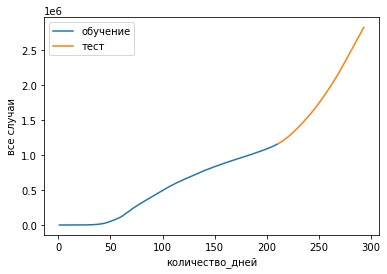

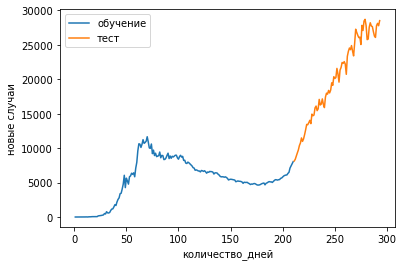

In [ ]:
for col_name in df_covid_rus.columns[-3:-1]:
    plt.plot(df_train['day_count'],df_train[col_name], label = 'обучение')
    plt.plot(df_test['day_count'],df_test[col_name],  label = 'тест')
    plt.legend()
    plt.xlabel('количество_дней')
    if col_name == 'total_cases':
        plt.ylabel('все случаи')
    else:
        plt.ylabel('новые случаи')
    plt.show()

В данной работе предпринята попытка использования линейной регрессии для предсказания заболеваемости.

Зададим параметры для обучения модели,которую построим.

In [ ]:
def train_model(xs, ys, alpha=0, use_lasso=False):
    xs = np.array(xs).reshape(-1, 1)
    ys = np.log(np.array(ys) + 0.00001)
    if alpha == 0:
        return linear_model.LinearRegression(fit_intercept=True).fit( xs, ys )
    else:
        if use_lasso:
            return linear_model.Lasso(alpha=alpha, fit_intercept=True).fit( xs, ys )
        else:
            return linear_model.Ridge(alpha=alpha, fit_intercept=True).fit( xs, ys )

Сделаем две обыкновенные линейные модели.

In [ ]:
simple_model = train_model(df_train['day_count'], df_train['total_cases'])

[0.04274065]


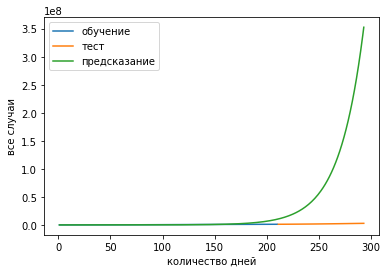

[0.02862151]


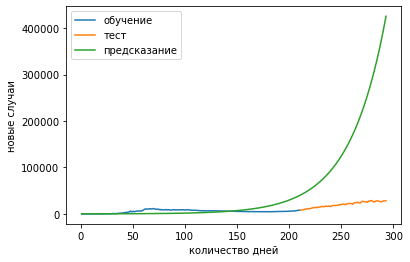

In [ ]:
for col_name in df_covid_rus.columns[-3:-1]:
    model = train_model(df_train['day_count'], df_train[col_name])
    print(model.coef_)
    pred = np.exp(model.predict(pd.DataFrame(df_covid_rus['day_count'])))
    plt.plot(df_train['day_count'],df_train[col_name], label = 'обучение')
    plt.plot(df_test['day_count'],df_test[col_name],  label = 'тест')
    plt.plot(df_covid_rus['day_count'],pred,  label = 'предсказание')
    plt.legend()
    plt.xlabel('количество дней')
    if col_name == 'total_cases':
        plt.ylabel('все случаи')
    else:
        plt.ylabel('новые случаи')
    plt.show()

Легко заметить, что модели работают плохо, тк  линия предсказания "улетает" далеко наверх.

Также сделаем такие же модели с первого по 60 день.

[0.04274065]


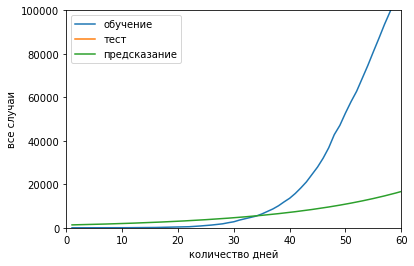

[0.02862151]


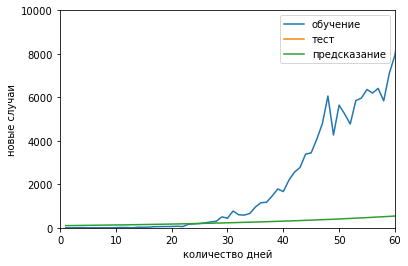

In [ ]:
for col_name in df_covid_rus.columns[-3:-1]:
    model = train_model(df_train['day_count'], df_train[col_name])
    print(model.coef_)
    pred = np.exp(model.predict(pd.DataFrame(df_covid_rus['day_count'])))
    plt.plot(df_train['day_count'],df_train[col_name], label = 'обучение')
    plt.plot(df_test['day_count'],df_test[col_name],  label = 'тест')
    plt.plot(df_covid_rus['day_count'],pred,  label = 'предсказание')
    plt.legend()
    plt.xlabel('количество дней')
    plt.ylabel('новые случаи')
    plt.xlim(0,60)
    if col_name == 'total_cases':
        plt.ylim(0,100000)
        plt.ylabel('все случаи')

    else:
        plt.ylim(0,10000)

    plt.show()

In [ ]:
import scipy.stats as sps

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
num_of_days =170
df_covid_rus['new_cases'] = df_covid_rus['new_cases'].apply(lambda x: x if x != 0 else 1)
#f_covid_rus_2['new_cases'] = df_covid_rus_2['new_cases'].apply(lambda x: x if x != 0 else 1)
df_train = df_covid_rus[0:num_of_days-20]
df_test = df_covid_rus[num_of_days-20:-1]
df_test_2 = df_covid_rus[num_of_days+100:-1]
df_train_2 = df_covid_rus[num_of_days:num_of_days+100]

df_train['sq'] = df_train['day_count'].apply(lambda x: x**2)
df_test['sq'] = df_test['day_count'].apply(lambda x: x**2)
df_covid_rus['sq'] = df_covid_rus['day_count'].apply(lambda x: x**2)
df_train['tr'] = df_train['day_count'].apply(lambda x: -x**3)

df_train_2['sq'] = df_train_2['day_count'].apply(lambda x: x**2)
df_test_2['sq'] = df_test_2['day_count'].apply(lambda x: x**2)
df_covid_rus_2['sq'] = df_covid_rus_2['day_count'].apply(lambda x: x**2)
df_train_2['tr'] = df_train_2['day_count'].apply(lambda x: -x**3)
df_test_2['tr'] = df_test_2['day_count'].apply(lambda x: -x**3)
df_covid_rus_2['tr'] = df_covid_rus_2['day_count'].apply(lambda x: -x**3)
df_covid_rus['tr'] = df_covid_rus['day_count'].apply(lambda x: -x**3)

Построим модель сигмоиды и посмотрим насколько хорошо и точно она работает

In [ ]:
sigmoid_model = linear_model.Ridge(fit_intercept=True).fit(
    df_train[['day_count','sq']],
    np.log(np.array(df_train['new_cases'])))

In [ ]:
sigmoid_model_2 = linear_model.Ridge(fit_intercept=True).fit(
    df_train_2[['day_count','sq']],
    np.log(np.array(df_train_2['new_cases'])))

In [ ]:
df_covid_rus.head()

,date,total_cases,new_cases,day_count,sq,tr
40713,2020-03-03,3.0,1.0,1,1,-1
40714,2020-03-04,3.0,1.0,2,4,-8
40715,2020-03-05,4.0,1.0,3,9,-27
40716,2020-03-06,13.0,9.0,4,16,-64
40717,2020-03-07,13.0,1.0,5,25,-125




Построим график второй степени для первой волны вируса и такой же для второй волны. Затем построим один график третьей степени для обеих волн и сравним с предыдущими двумя.

обучение- данные, которые модель "видела" и на основе которых учится искать закономерности и прогнозировать;

тест- данные, которые модель не видела и потом на этих данных мы проверяем как хорошо наша модель работает;

предсказание- предсказанная модель компьютером на основе изученных ею данных;

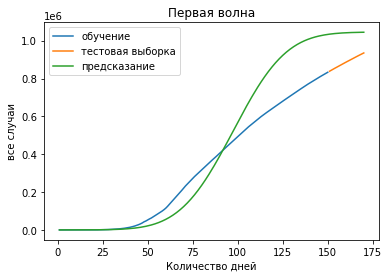

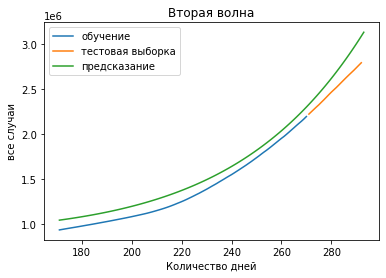

In [ ]:
pred = (np.exp(sigmoid_model.predict(pd.DataFrame(df_covid_rus[['day_count','sq']][:num_of_days])))).cumsum()
pred_2 = (np.exp(sigmoid_model_2.predict(pd.DataFrame(df_covid_rus_2[['day_count','sq']][num_of_days:])))).cumsum() + pred[-1]
plt.plot(df_train['day_count'],df_train['total_cases'], label = 'обучение')
plt.plot(df_test['day_count'][:20],df_test['total_cases'][:20],  label = 'тестовая выборка')
plt.plot(df_covid_rus['day_count'][:num_of_days],pred,  label = 'предсказание')
plt.legend()
plt.xlabel('Количество дней')
plt.ylabel('все случаи')
plt.title('Первая волна')
#print(f'a = {sigmoid_model.coef_[1]},b = {sigmoid_model.coef_[0]},c = {sigmoid_model.intercept_}')
plt.show()
#plt.ylim(0,100000)
plt.plot(df_train_2['day_count'],df_train_2['total_cases'], label = 'обучение')
plt.plot(df_test_2['day_count'],df_test_2['total_cases'],  label = 'тестовая выборка')
plt.plot(df_covid_rus_2['day_count'][num_of_days:],pred_2,  label = 'предсказание')
plt.legend()
plt.xlabel('Количество дней')
plt.ylabel('все случаи')
plt.title('Вторая волна')
#print(f'a = {sigmoid_model_2.coef_[1]},b = {sigmoid_model_2.coef_[0]},c = {sigmoid_model_2.intercept_}')
#plt.ylim(0,100000)
#plt.grid()
plt.show()

Легко заметить, что предсказание модели на первую волну не совсем точное, а на вторую уже практически точь-в-точь.

Но для того, чтоб точно определить хорошо работает ли модель нам нужно знать точное количество волн пандемии. В нашем случае их 2 и модель их все хорошо сумела предсказать, так как под каждую волну я делала отдельную модель второй степени



Построим график третей степени для обеих волн

In [ ]:
num_of_days =240
df_covid_rus['new_cases'] = df_covid_rus['new_cases'].apply(lambda x: x if x != 0 else 1)
df_train = df_covid_rus[:num_of_days]
df_test = df_covid_rus[num_of_days:300]

df_train['sq'] = df_train['day_count'].apply(lambda x: x**2)
df_test['sq'] = df_test['day_count'].apply(lambda x: x**2)
df_covid_rus['sq'] = df_covid_rus['day_count'].apply(lambda x: x**2)
df_train['tr'] = df_train['day_count'].apply(lambda x: -x**3)
df_test['tr'] = df_test['day_count'].apply(lambda x: -x**3)
df_covid_rus['tr'] = df_covid_rus['day_count'].apply(lambda x: -x**3)

In [ ]:
sigmoid_model = linear_model.Ridge(fit_intercept=True).fit(
    df_train[['day_count','sq','tr']],
    np.log(np.array(df_train['new_cases'])))

a = -0.0018239167198782855,b = 0.2314420108107965,c = 0.28502696371328895


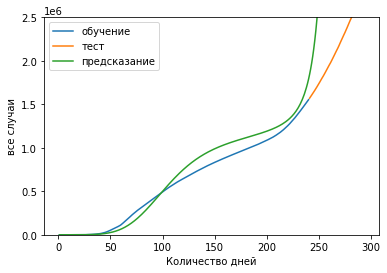

In [ ]:
pred = (np.exp(sigmoid_model.predict(pd.DataFrame(df_covid_rus[['day_count','sq','tr']])))).cumsum()
plt.plot(df_train['day_count'],df_train['total_cases'], label = 'обучение')
plt.plot(df_test['day_count'],df_test['total_cases'],  label = 'тест')
plt.plot(df_covid_rus['day_count'],pred,  label = 'предсказание')
plt.legend()
plt.xlabel('Количество дней')
plt.ylabel('все случаи')
plt.ylim(0,2.5*10**6)
print(f'a = {sigmoid_model.coef_[1]},b = {sigmoid_model.coef_[0]},c = {sigmoid_model.intercept_}')

Получается, что модель третей степени практически идеально предсказывает ближайшие события

И, зная, что волн на данный момент 2 мы можем с уверенностью пользоваться данной моделью, но если будет третья волна, то потребуется использовать модель с графиком четвертой степени. И таким образом, получается, чтоб детально предсказывать статистику заболевших нам нужна информация о количестве волн пандемии.

In [ ]:
countries = set(df_covid[df_covid['total_cases']>10**6]['location'].unique())

отделим страны, у которых свыше 1 000 000 заболевших.

In [ ]:
countries

{'Argentina',
 'Brazil',
 'Colombia',
 'France',
 'Germany',
 'India',
 'Iran',
 'Italy',
 'Mexico',
 'Poland',
 'Russia',
 'Spain',
 'Turkey',
 'United Kingdom',
 'United States',
 'World'}

In [ ]:
countries.update(np.random.choice(df_covid[df_covid['total_cases']>10**6]['location'].unique(),size = 15))

In [ ]:
countries.discard('World')
#countries.discard('United States')

Далее представлен график стран, в которых свыше 1 000 000 заболевших

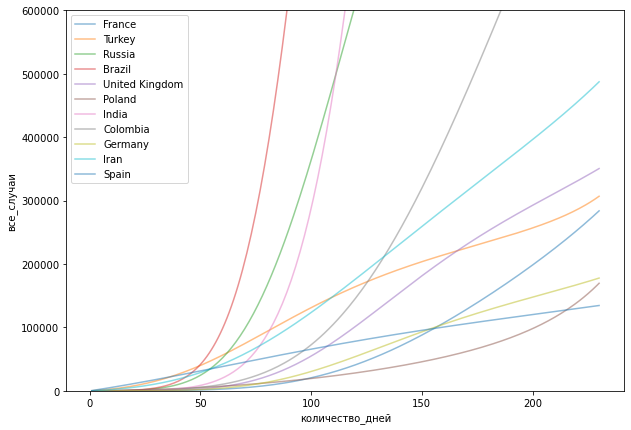

In [ ]:
coefs=[]
num_days = 230
plt.figure(figsize=(10, 7))
for country in countries:
    df = df_covid[df_covid['location'] == country][['date', 'total_cases', 'new_cases']]
    df = df[df['total_cases'] >= 5]
    df['day_count'] = np.arange(1, len(df)+1)
    df['sq'] = df['day_count'].apply(lambda x: x**2)
    df['tr'] = df['day_count'].apply(lambda x: x**3)
    df['new_cases'] = df['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df[['day_count','sq','tr']],np.log(np.array(df['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)
    coefs.append(sigmoid_model.coef_)
plt.legend()
plt.ylim(0,6*10**5)
plt.xlabel('количество_дней')
plt.ylabel('все_случаи')
plt.show()

На графике ниже представлена точечная модель разных стан с больее чем 1 000 000 заболевших. Здесь можно выделить отдельные группы стран на графике с похожей статистикой, как Мексика и Бразилия или Индия и Америка или Англия и Германия, в которых вероятнее всего принимались схожие меры по борьбе с пандемией.

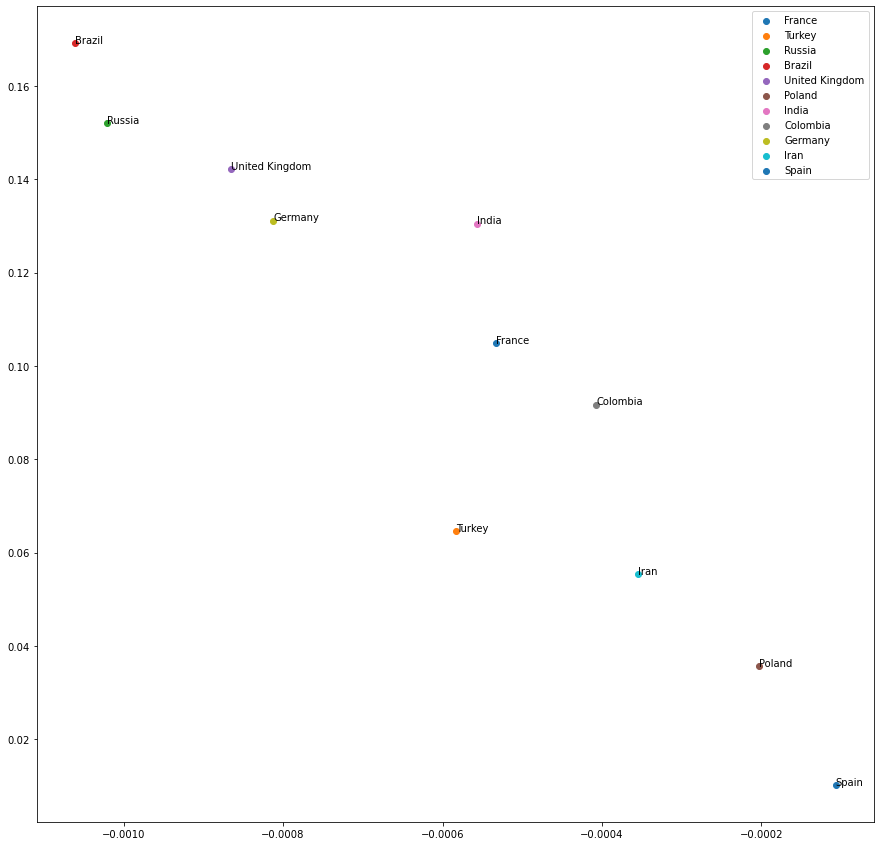

In [ ]:
plt.figure(figsize=(15, 15))
for cof,country in zip(coefs,countries):
    plt.scatter(cof[1],cof[0], label = country)
    plt.annotate(country, (cof[1],cof[0]))
    plt.legend()
#plt.xlim(-0.0041,0.00)

В итоге, получается, что модель сигмоиды может хорошо предсказывать только в том случае, если мы точно знаем, сколько было волн пандемии и используем график подходящей степени. Но мы можем выделять страны со схожими путями развития с помощью точечного графика. Данная модель может быть востребована для предсказывания дальнейших событий в жизни страны и всего мира. Также на основании модели можно делать выводы об эффективности принятх мер по борьбе с пандемией коронавируса.

Из графика выше, в котором четко видно разделение стран по группам я выбрала по 2 страны из каждой группы, где это возможно и построила им отдельные графики, чтобы убедиться в том, что графики между "группами" действительно отличаются, а внутри "групп" достаточно схожи.

группа 1- Италия

In [ ]:
countries.discard('Italy')

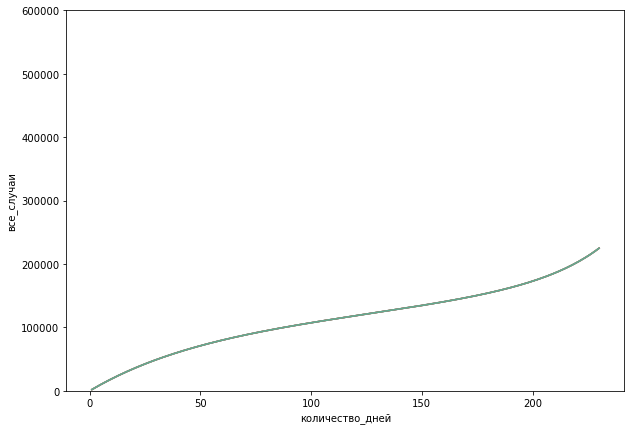

In [ ]:
coefs=[]
num_days = 230
plt.figure(figsize=(10, 7))
for country in countries:
    df = df_covid[df_covid['location'] == 'Italy'][['date', 'total_cases', 'new_cases']]
    df = df[df['total_cases'] >= 5]
    df['day_count'] = np.arange(1, len(df)+1)
    df['sq'] = df['day_count'].apply(lambda x: x**2)
    df['tr'] = df['day_count'].apply(lambda x: x**3)
    df['new_cases'] = df['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df[['day_count','sq','tr']],np.log(np.array(df['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)
    coefs.append(sigmoid_model.coef_)

plt.ylim(0,6*10**5)
plt.xlabel('количество_дней')
plt.ylabel('все_случаи')
plt.show()

группа 2- Индия

In [ ]:
countries.discard('India')

In [ ]:
countries.discard('Argentina')
countries.discard('India')

ValueError: Length of values (289) does not match length of index (294)

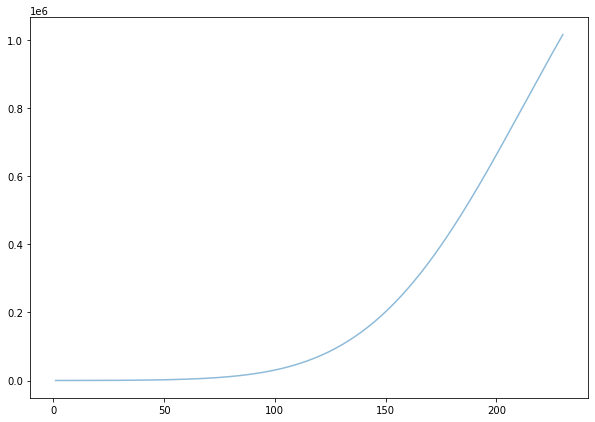

In [ ]:
coefs=[]
num_days = 230
plt.figure(figsize=(10, 7))
for country in countries:
    df = df_covid[df_covid['location'] == 'Argentina'][['date', 'total_cases', 'new_cases']]
    df = df[df['total_cases'] >= 5]
    df['day_count'] = np.arange(1, len(df)+1)
    df['sq'] = df['day_count'].apply(lambda x: x**2)
    df['tr'] = df['day_count'].apply(lambda x: x**3)
    df['new_cases'] = df['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df[['day_count','sq','tr']],np.log(np.array(df['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)
    coefs.append(sigmoid_model.coef_)
    df_2 = df_covid[df_covid['location'] == 'India'][['date', 'total_cases', 'new_cases']]
    df_2 = df_2[df_2['total_cases'] >= 5]
    df_2['day_count'] = np.arange(1, len(df)+1)
    df_2['sq'] = df_2['day_count'].apply(lambda x: x**2)
    df_2['tr'] = df_2['day_count'].apply(lambda x: x**3)
    df_2['new_cases'] = df_2['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df_2[['day_count','sq','tr']],np.log(np.array(df_2['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)
    coefs.append(sigmoid_model.coef_)

plt.ylim(0,6*10**5)
plt.xlabel('количество_дней')
plt.ylabel('все_случаи')
plt.show()

группа 3 - Великобритания и Германия

In [ ]:
countries.discard('United Kingdom')

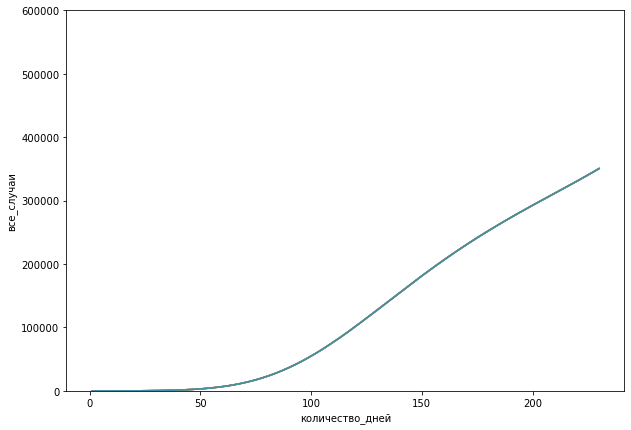

In [ ]:
coefs=[]
num_days = 230
plt.figure(figsize=(10, 7))
for country in countries:
    df = df_covid[df_covid['location'] == 'United Kingdom'][['date', 'total_cases', 'new_cases']]
    df = df[df['total_cases'] >= 5]
    df['day_count'] = np.arange(1, len(df)+1)
    df['sq'] = df['day_count'].apply(lambda x: x**2)
    df['tr'] = df['day_count'].apply(lambda x: x**3)
    df['new_cases'] = df['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df[['day_count','sq','tr']],np.log(np.array(df['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)

plt.ylim(0,6*10**5)
plt.xlabel('количество_дней')
plt.ylabel('все_случаи')
plt.show()

In [ ]:
countries.discard('Germany')

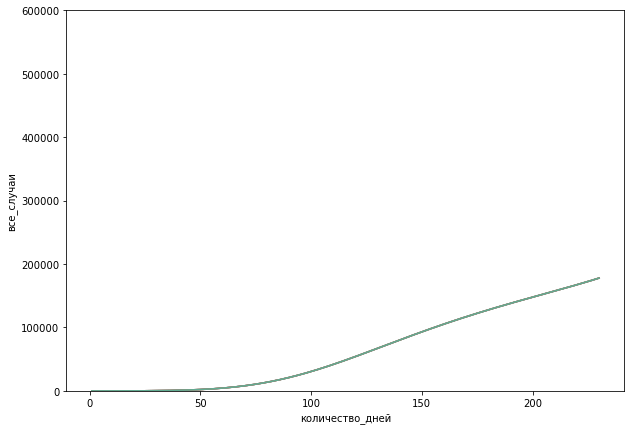

In [ ]:
coefs=[]
num_days = 230
plt.figure(figsize=(10, 7))
for country in countries:
    df = df_covid[df_covid['location'] == 'Germany'][['date', 'total_cases', 'new_cases']]
    df = df[df['total_cases'] >= 5]
    df['day_count'] = np.arange(1, len(df)+1)
    df['sq'] = df['day_count'].apply(lambda x: x**2)
    df['tr'] = df['day_count'].apply(lambda x: x**3)
    df['new_cases'] = df['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df[['day_count','sq','tr']],np.log(np.array(df['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)
    coefs.append(sigmoid_model.coef_)

plt.ylim(0,6*10**5)
plt.xlabel('количество_дней')
plt.ylabel('все_случаи')
plt.show()

группа 4 - США

In [ ]:
countries.discard('United States')

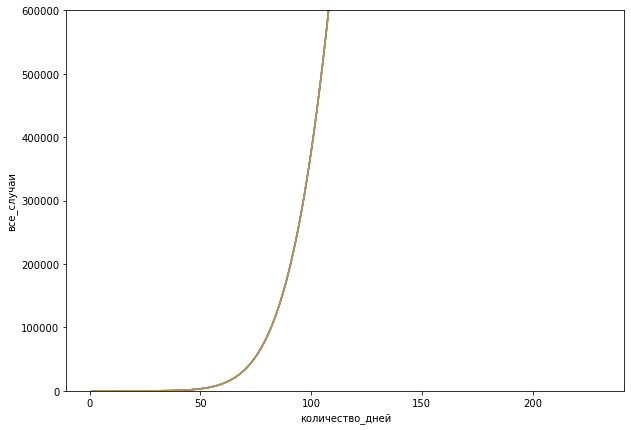

In [ ]:
coefs=[]
num_days = 230
plt.figure(figsize=(10, 7))
for country in countries:
    df = df_covid[df_covid['location'] == 'United States'][['date', 'total_cases', 'new_cases']]
    df = df[df['total_cases'] >= 5]
    df['day_count'] = np.arange(1, len(df)+1)
    df['sq'] = df['day_count'].apply(lambda x: x**2)
    df['tr'] = df['day_count'].apply(lambda x: x**3)
    df['new_cases'] = df['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df[['day_count','sq','tr']],np.log(np.array(df['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)
    coefs.append(sigmoid_model.coef_)

plt.ylim(0,6*10**5)
plt.xlabel('количество_дней')
plt.ylabel('все_случаи')
plt.show()

Группа 5 - Мексика и Россия

In [ ]:
countries.discard('Mexico')

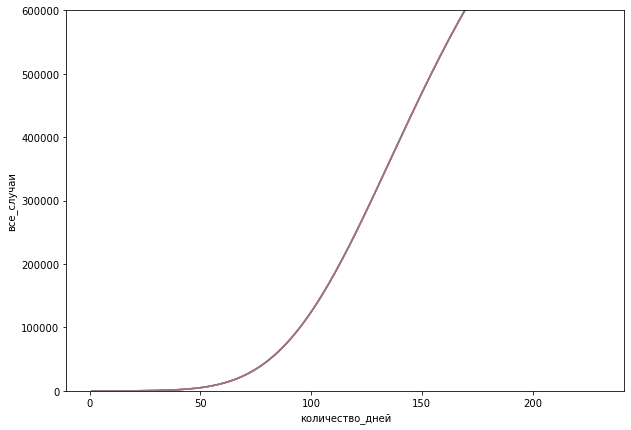

In [ ]:
coefs=[]
num_days = 230
plt.figure(figsize=(10, 7))
for country in countries:
    df = df_covid[df_covid['location'] == 'Mexico'][['date', 'total_cases', 'new_cases']]
    df = df[df['total_cases'] >= 5]
    df['day_count'] = np.arange(1, len(df)+1)
    df['sq'] = df['day_count'].apply(lambda x: x**2)
    df['tr'] = df['day_count'].apply(lambda x: x**3)
    df['new_cases'] = df['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df[['day_count','sq','tr']],np.log(np.array(df['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)
    coefs.append(sigmoid_model.coef_)

plt.ylim(0,6*10**5)
plt.xlabel('количество_дней')
plt.ylabel('все_случаи')
plt.show()

In [ ]:
countries.discard('Russia')

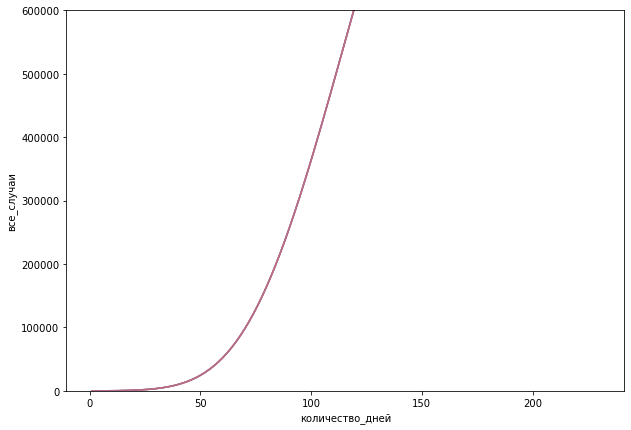

In [ ]:
coefs=[]
num_days = 230
plt.figure(figsize=(10, 7))
for country in countries:
    df = df_covid[df_covid['location'] == 'Russia'][['date', 'total_cases', 'new_cases']]
    df = df[df['total_cases'] >= 5]
    df['day_count'] = np.arange(1, len(df)+1)
    df['sq'] = df['day_count'].apply(lambda x: x**2)
    df['tr'] = df['day_count'].apply(lambda x: x**3)
    df['new_cases'] = df['new_cases'].apply(lambda x: abs(x) if x != 0 else 1)
    sigmoid_model = linear_model.Ridge(alpha=0.01,fit_intercept=True).fit(df[['day_count','sq','tr']],np.log(np.array(df['new_cases'])))
    x = np.arange(1, num_days+1)
    X = np.array([x, x**2, x**3]).T
    pred = np.exp(sigmoid_model.predict(pd.DataFrame(X))).cumsum()
    plt.plot(x, pred, label=country,alpha=0.5)
    coefs.append(sigmoid_model.coef_)
plt.ylim(0,6*10**5)
plt.xlabel('количество_дней')
plt.ylabel('все_случаи')
plt.show()